In [1]:
### EX2:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1234)

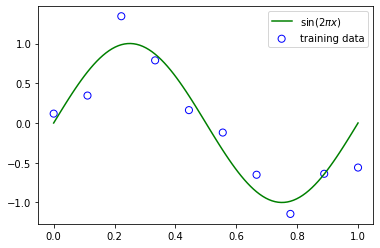

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [3]:
print(x_val, y_val)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [ 0.28750893  0.89077412  1.22313879  0.3607117   0.2585008  -0.34149055
 -0.76466205 -0.91253477 -0.31249806 -0.38672639]


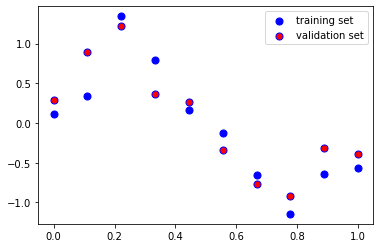

In [4]:
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=50, label="training set")
plt.scatter(x_val, y_val, facecolor="red", edgecolor="b", s=50, label="validation set")
plt.legend()
plt.show()

In [5]:
def concatenate(x):
  i = np.ones(len(x)).reshape(-1,1)
  x = np.concatenate((i, x.reshape(-1,1)), axis = 1)
  return x

def cal_w(x, y):
  a = np.dot(x.T, x)
  b = np.dot(x.T, y)
  w = np.dot(np.linalg.pinv(a), b)
  return w

def cal_mse(y, predict):
  return 1/len(y) * np.sum((predict - y)**2)

def predict(x, w):
  return np.dot(x,w)

In [6]:
# bac 1
X_train_1 = concatenate(x_train)
X_val_1 = concatenate(x_val)
w_1 = cal_w(X_train_1, y_train)
pred_train_1 = predict(X_train_1, w_1)
pred_val_1 = predict(X_val_1, w_1)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train,pred_train_1),
        cal_mse(y_val, pred_val_1)))

# mse trên tập training và validation đều nhỏ 
# underfitting

mse in training set 0.23077661663788357 
mse in validation set 0.18132877322593322


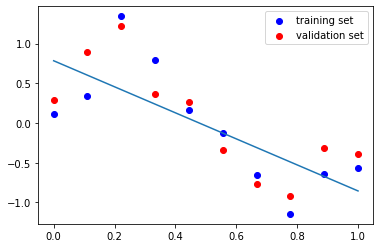

In [7]:
plt.plot(x_train,pred_train_1)
plt.scatter(x_train, y_train, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

In [8]:
#bac 3 
x2 = np.power(x_train, 2).reshape(-1,1)
x3 = np.power(x_train, 3).reshape(-1,1)
x_3 = np.concatenate((x_train.reshape(-1,1), x2, x3), axis = 1)

X_train_3 = np.concatenate((np.ones(len(x_3)).reshape(-1,1),x_3),axis = 1)

x2_val = np.power(x_val, 2).reshape(-1,1)
x3_val = np.power(x_val, 3).reshape(-1,1)
x_3_val = np.concatenate((x_val.reshape(-1,1), x2_val, x3_val), axis = 1)

X_val_3 = np.concatenate((np.ones(len(x_3_val)).reshape(-1,1), x_3_val), axis = 1)

In [9]:
w_3 = cal_w(X_train_3, y_train)
pred_train_3 = predict(X_train_3, w_3)
pred_val_3 = predict(X_val_3, w_3)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train,pred_train_3),
        cal_mse(y_val, pred_val_3)))

# mse 2 tập tốt

mse in training set 0.04982387306784301 
mse in validation set 0.07772268092528212


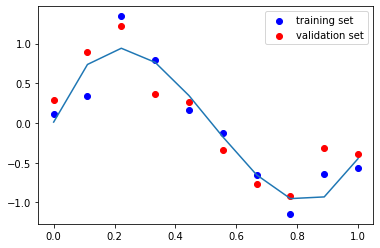

In [10]:
plt.plot(x_train,pred_train_3)
plt.scatter(x_train, y_train, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

In [11]:
#bac 9 
x2 = np.power(x_train, 2).reshape(-1,1)
x3 = np.power(x_train, 3).reshape(-1,1)
x4 = np.power(x_train, 4).reshape(-1,1)
x5 = np.power(x_train, 5).reshape(-1,1)
x6 = np.power(x_train, 6).reshape(-1,1)
x7 = np.power(x_train, 7).reshape(-1,1)
x8 = np.power(x_train, 8).reshape(-1,1)
x9 = np.power(x_train, 9).reshape(-1,1)

X_train_9 = np.concatenate((np.ones(len(x_train)).reshape(-1,1),
                            x_train.reshape(-1,1), x2, x3,
                            x4, x5, x6, x7, x8, x9),axis = 1)
X_train_9

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

In [12]:
x2_val = np.power(x_val, 2).reshape(-1,1)
x3_val = np.power(x_val, 3).reshape(-1,1)
x4_val = np.power(x_val, 4).reshape(-1,1)
x5_val = np.power(x_val, 5).reshape(-1,1)
x6_val = np.power(x_val, 6).reshape(-1,1)
x7_val = np.power(x_val, 7).reshape(-1,1)
x8_val = np.power(x_val, 8).reshape(-1,1)
x9_val = np.power(x_val, 9).reshape(-1,1)

X_val_9 = np.concatenate((np.ones(len(x_val)).reshape(-1,1),
                            x_val.reshape(-1,1), x2_val, x3_val,
                            x4_val, x5_val, x6_val, x7_val, x8_val, x9_val),axis = 1)
X_val_9

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

In [13]:
w_9 = cal_w(X_train_9, y_train)
pred_train_9 = predict(X_train_9, w_9)
pred_val_9 = predict(X_val_9, w_9)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train,pred_train_9),
        cal_mse(y_val, pred_val_9)))

#mse trên training ~ 0 trong khí validation lại lớn hơn nhiều
# overfitting

mse in training set 5.623827968910547e-07 
mse in validation set 0.07833656062889711


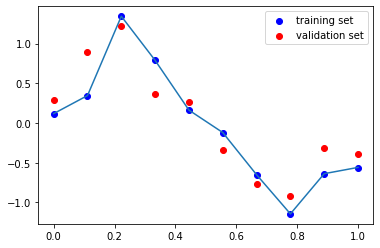

In [14]:
plt.plot(x_train,pred_train_9)
plt.scatter(x_train, y_train, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()

In [15]:
### EX3:
x_train_100, y_train_100 = create_toy_data(func, 110, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

In [16]:
#bac 9 
x2_ = np.power(x_train_100, 2).reshape(-1,1)
x3_ = np.power(x_train_100, 3).reshape(-1,1)
x4_ = np.power(x_train_100, 4).reshape(-1,1)
x5_ = np.power(x_train_100, 5).reshape(-1,1)
x6_ = np.power(x_train_100, 6).reshape(-1,1)
x7_ = np.power(x_train_100, 7).reshape(-1,1)
x8_ = np.power(x_train_100, 8).reshape(-1,1)
x9_ = np.power(x_train_100, 9).reshape(-1,1)

X_train_9_100 = np.concatenate((np.ones(len(x_train_100)).reshape(-1,1),
                            x_train_100.reshape(-1,1), x2_, x3_,
                            x4_, x5_, x6_, x7_, x8_, x9_),axis = 1)
X_train_9_100

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.17431193e-03, 8.41679993e-05, ...,
        5.47034245e-15, 5.01866280e-17, 4.60427780e-19],
       [1.00000000e+00, 1.83486239e-02, 3.36671997e-04, ...,
        7.00203833e-13, 1.28477768e-14, 2.35739023e-16],
       ...,
       [1.00000000e+00, 9.81651376e-01, 9.63639424e-01, ...,
        8.78417457e-01, 8.62299706e-01, 8.46477693e-01],
       [1.00000000e+00, 9.90825688e-01, 9.81735544e-01, ...,
        9.37520565e-01, 9.28919459e-01, 9.20397262e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [18]:
X_val_9.shape

(10, 10)

In [19]:
w_9_100 = cal_w(X_train_9_100, y_train_100)
w_9_100.shape

(10,)

In [20]:
w_9_100 = cal_w(X_train_9_100, y_train_100)
pred_train_9_100 = predict(X_train_9_100, w_9_100)
pred_val_9_100 = predict(X_val_9, w_9_100)
print("mse in training set %s \nmse in validation set %s" 
      %(cal_mse(y_train_100,pred_train_9_100),
        cal_mse(y_val, pred_val_9_100)))

# mse tren 2 tap training va validation da tot hon

mse in training set 0.052534682335892965 
mse in validation set 0.10265817697415525


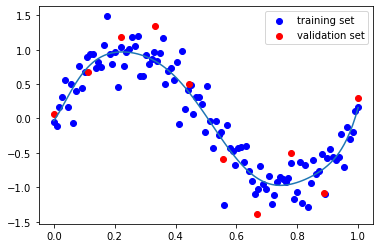

In [21]:
plt.plot(x_train_100, pred_train_9_100)
plt.scatter(x_train_100, y_train_100, color = 'blue', label = 'training set')
plt.scatter(x_val, y_val, color = 'red', label = 'validation set')
plt.legend()
plt.show()